<a href="https://colab.research.google.com/github/nithinivi/DL_learning/blob/master/Celsl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --header="Host: doc-00-ac-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,ml;q=0.7" --header="Referer: https://drive.google.com/drive/folders/18kpW8s6Xgq7uaSPj40uZezmgvmzAgmqH" --header="Cookie: AUTH_q007au226734ts5jvqiq2qdmje4ctha2_nonce=ck7fc0hemvipq" --header="Connection: keep-alive" "https://doc-00-ac-docs.googleusercontent.com/docs/securesc/mo7nfj3ncdbvd2pk9n8lnq0h7i4c13mu/6p9vf65rjva5uovul28q3i10geqj283e/1559707200000/13843759445798744366/10484542990134652748/14aKLIjR03Q7TZ48i5xSRXLNvthFpdk8j?e=download&nonce=ck7fc0hemvipq&user=10484542990134652748&hash=6k1gh4f09q79vt0gqpl1vsve5ohb4en5" -O "train_data.zip" -c


--2019-06-05 10:47:50--  https://doc-00-ac-docs.googleusercontent.com/docs/securesc/mo7nfj3ncdbvd2pk9n8lnq0h7i4c13mu/6p9vf65rjva5uovul28q3i10geqj283e/1559707200000/13843759445798744366/10484542990134652748/14aKLIjR03Q7TZ48i5xSRXLNvthFpdk8j?e=download&nonce=ck7fc0hemvipq&user=10484542990134652748&hash=6k1gh4f09q79vt0gqpl1vsve5ohb4en5
Resolving doc-00-ac-docs.googleusercontent.com (doc-00-ac-docs.googleusercontent.com)... 172.217.27.1, 2404:6800:4003:803::2001
Connecting to doc-00-ac-docs.googleusercontent.com (doc-00-ac-docs.googleusercontent.com)|172.217.27.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘train_data.zip’

train_data.zip          [  <=>               ]  11.87M  49.7MB/s    in 0.2s    

2019-06-05 10:47:51 (49.7 MB/s) - ‘train_data.zip’ saved [12444061]



In [2]:
!unzip train_data.zip

Archive:  train_data.zip
   creating: data/
   creating: data/raw/
  inflating: data/raw/ruronmqwzbuzpegxtmup.jpg  
  inflating: data/raw/ttcfprpxxgkwtyeyidaj.jpg  
  inflating: data/raw/lupgnndxdularmpxjske.jpg  
  inflating: data/raw/htdlanphlqtfjlicgmce.jpg  
  inflating: data/raw/cdegxxuehavxkkcuruox.jpg  
  inflating: data/raw/kzmdyipqfsugzrneqpqp.jpg  
  inflating: data/raw/vilgmgzeastzzenbhfcz.jpg  
  inflating: data/raw/hhvyyzlurtycgvbpuvwq.jpg  
  inflating: data/raw/kszxsxeuzedehyulodvh.jpg  
  inflating: data/raw/doshjjkjhvfnikhfuuyd.jpg  
  inflating: data/raw/eikonhzivdbscisxeiat.jpg  
  inflating: data/raw/rtodqjkpyqolbymdjbid.jpg  
  inflating: data/raw/tvurmfzsagmebtbdujld.jpg  
  inflating: data/raw/oxfbvhntysbfbqmbacpa.jpg  
  inflating: data/raw/ilbvmkirddboiqrdwwaq.jpg  
  inflating: data/raw/hhzrefccgahcusrvsozx.jpg  
  inflating: data/raw/uxajjplgyqmklkfdzsge.jpg  
  inflating: data/raw/bgqmdlupcqfczqvtczvj.jpg  
  inflating: data/raw/undkuwkjhsvwgfwzyvnq.jpg  
  

In [3]:
!pip install fastai opencv-python opencv-contrib-python

In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import cv2
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [6]:
ls

data/  sample_data/  train_data.zip


In [0]:
PATH = pathlib.Path("data")

In [8]:
!ls {PATH}

gt  raw


In [9]:
path_lbl = PATH/'gt'
path_img = PATH/'raw'
pathlib.Path(PATH/"gt_binary").mkdir(exist_ok=True)
binary = PATH/"gt_binary"
binary

PosixPath('data/gt_binary')

In [10]:

fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('data/raw/vxagmxxtzxepflgmciqm.jpg'),
 PosixPath('data/raw/hcqcvtbphxfrpqslirpy.jpg'),
 PosixPath('data/raw/wuxaxnyvbzbeughvlprb.jpg')]

In [11]:
fnames =get_image_files(path_lbl)
fnames[:3]

[PosixPath('data/gt/vxagmxxtzxepflgmciqm.jpg'),
 PosixPath('data/gt/hcqcvtbphxfrpqslirpy.jpg'),
 PosixPath('data/gt/wuxaxnyvbzbeughvlprb.jpg')]

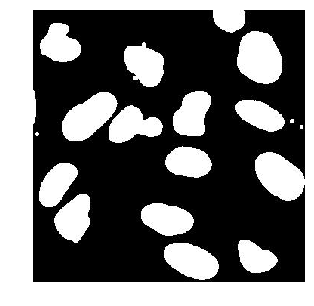

In [12]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

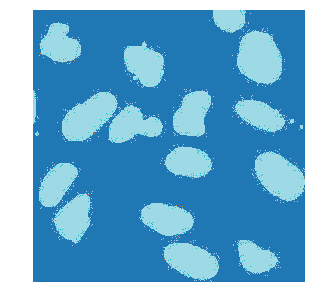

In [15]:
get_y_fn = lambda x: path_lbl/x.name
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

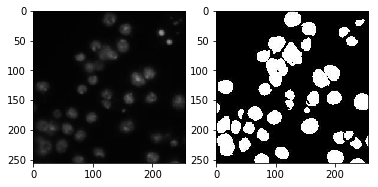

In [16]:
img = cv2.imread("data/raw/nlfcmfqelwbhpvrmsdny.jpg")
gt = cv2.imread("data/gt/nlfcmfqelwbhpvrmsdny.jpg")
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img)
ax[1].imshow(gt)

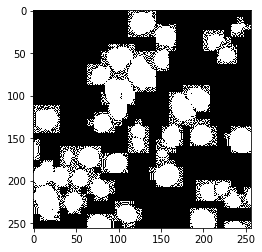

In [17]:
ret3,th3 = cv2.threshold(gt,0,255,cv2.THRESH_BINARY)
plt.imshow(th3)

In [18]:
x = np.reshape(gt, 196608)
y = np.bincount(x)
ii = np.nonzero(y)[0]
print(len([x for x in ii]))
[x for x in ii]

76


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 36,
 37,
 38,
 216,
 217,
 218,
 219,
 220,
 221,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255]

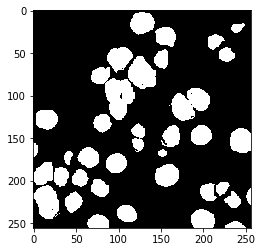

In [19]:
ret3,th3 = cv2.threshold(gt,100,255,cv2.THRESH_BINARY)
plt.imshow(th3)

In [0]:
for img in PATH.glob('gt/*.jpg'):
    gt = cv2.imread(os.fspath(img))
    ret3,th = cv2.threshold(gt,100,255,cv2.THRESH_BINARY)
    cv2.imwrite(os.fspath(binary/img.name), th)

In [0]:
path_lbl = binary
path_img = PATH/'raw'

In [22]:
fnames =get_image_files(path_lbl)
fnames[:3]

[PosixPath('data/gt_binary/vxagmxxtzxepflgmciqm.jpg'),
 PosixPath('data/gt_binary/hcqcvtbphxfrpqslirpy.jpg'),
 PosixPath('data/gt_binary/wuxaxnyvbzbeughvlprb.jpg')]

In [23]:

fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('data/raw/vxagmxxtzxepflgmciqm.jpg'),
 PosixPath('data/raw/hcqcvtbphxfrpqslirpy.jpg'),
 PosixPath('data/raw/wuxaxnyvbzbeughvlprb.jpg')]

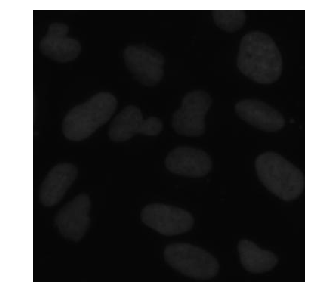

In [24]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

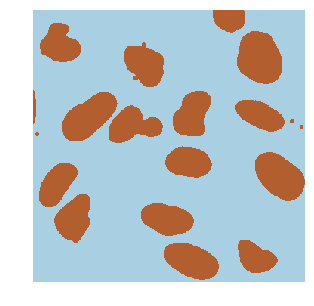

In [40]:
get_y_fn = lambda x: path_lbl/x.name
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=10, cmap = "Paired")

In [35]:
src_size = np.array(mask.shape[1:])
print(src_size)

[360 360]


In [29]:
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=8, have 15068MB of GPU RAM free


In [30]:
codes = np.array(["cell","active_region" ], dtype=str)
codes

array(['cell', 'active_region'], dtype='<U13')

In [0]:
class SegLabelListCustom(SegmentationLabelList):
    def open(self, fn): return open_mask(fn, div=True)

class SegItemListCustom(SegmentationItemList):
    _label_cls = SegLabelListCustom

codes = ['0','1']
src = (SegItemListCustom.from_folder(path_img)
       .split_by_rand_pct(valid_pct=0.2, seed=33)
      .label_from_func(get_y_fn, classes=codes))

data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))


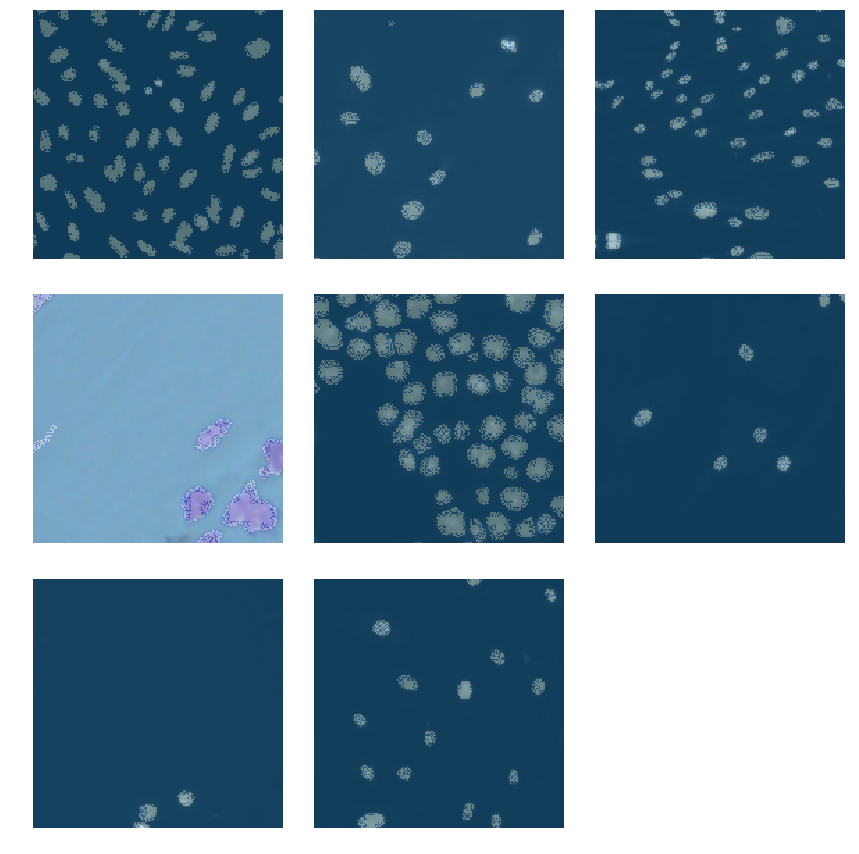

In [38]:
data.show_batch()

In [0]:
name2id = {'cell':0 , 'active_region':1}

def acc_cell(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)).float().mean()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 71197102.50it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


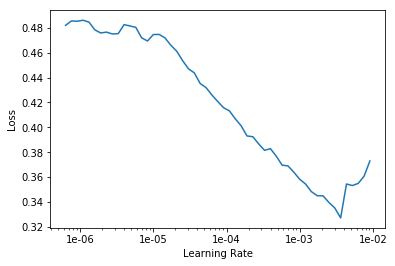

In [42]:
wd=1e-2
metrics = partial(dice, iou=True)

learn = unet_learner(data, models.resnet34,  metrics= metrics, wd=wd)
lr_find(learn)
learn.recorder.plot()

In [43]:
lr = 1e-4
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice,time
0,0.316940,0.270028,0.107338,00:18
1,0.225854,0.181711,0.493966,00:17
2,0.177309,0.153920,0.595867,00:17
3,0.147985,0.143119,0.633632,00:17
4,0.134988,0.130992,0.594074,00:17
5,0.121114,0.119771,0.651389,00:17
6,0.121498,0.121875,0.648171,00:17
7,0.111279,0.123182,0.607073,00:17
8,0.110786,0.119734,0.671665,00:17
9,0.104411,0.112592,0.670871,00:17


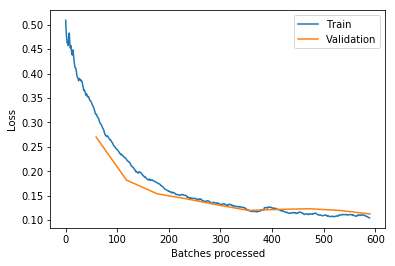

In [44]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

In [58]:

learn.load("stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (472 items)
x: SegItemListCustom
Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180)
y: SegLabelListCustom
ImageSegment (1, 180, 180),ImageSegment (1, 180, 180),ImageSegment (1, 180, 180),ImageSegment (1, 180, 180),ImageSegment (1, 180, 180)
Path: data/raw;

Valid: LabelList (118 items)
x: SegItemListCustom
Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180)
y: SegLabelListCustom
ImageSegment (1, 180, 180),ImageSegment (1, 180, 180),ImageSegment (1, 180, 180),ImageSegment (1, 180, 180),ImageSegment (1, 180, 180)
Path: data/raw;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride

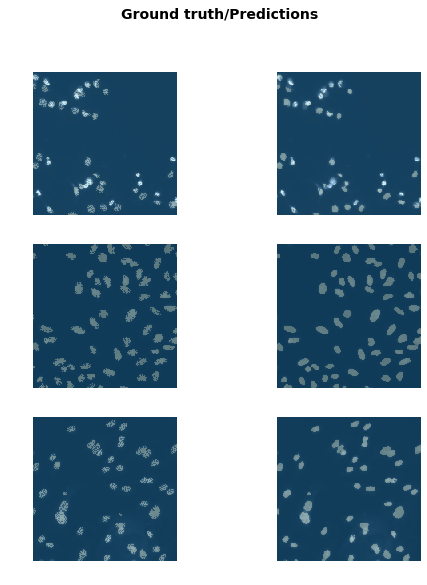

In [59]:
learn.show_results(rows=3, figsize=(8,9))

In [60]:
learn.unfreeze()
lrs = slice(lr/10)
learn.fit_one_cycle(12,max_lr =  slice(1e-6,1e-4), pct_start=0.8)

epoch,train_loss,valid_loss,dice,time
0,0.099075,0.111130,0.677342,00:18
1,0.100384,0.113896,0.686214,00:18
2,0.101417,0.115757,0.639985,00:18
3,0.101588,0.109316,0.678319,00:18
4,0.100740,0.110530,0.683590,00:18
5,0.099141,0.111943,0.686780,00:18
6,0.100658,0.109767,0.685976,00:18
7,0.099907,0.109617,0.686057,00:18
8,0.099916,0.110204,0.670077,00:18
9,0.100123,0.108645,0.692326,00:18


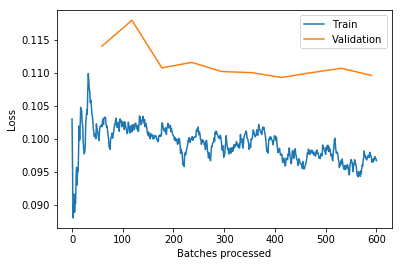

In [57]:
learn.recorder.plot_losses()